In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import d
import u

# Data Fetching

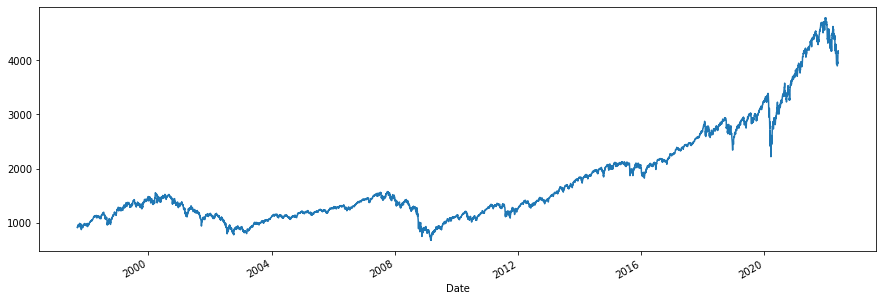

<AxesSubplot:xlabel='Date'>

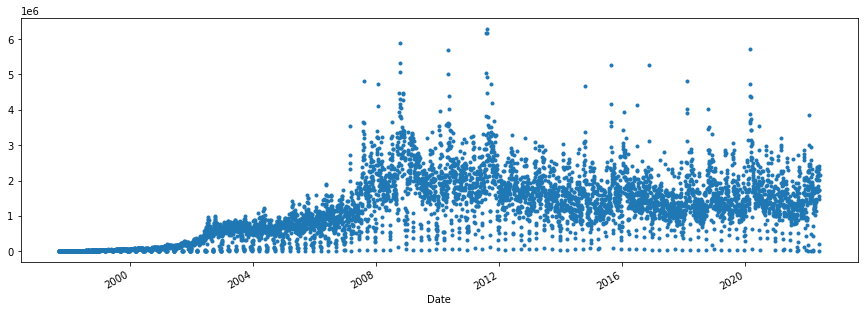

In [3]:
plt.rcParams["figure.figsize"] = (15, 5)

data = d.fetch("data/future/daily", "ES.csv")

data["Close"].plot.line()
plt.show()
data["Volume"].plot(style=".")

# Tick Bars

In [4]:
tick_bars = bars.create_tick_bars(data, int(253 / 12))
tick_bars.head()

,Volume,Open,Close,High,Low
Date,,,,,
1997-09-10,190770.0,915.25,982.25,989.5,908.50
1997-10-09,249160.0,978.00,942.25,979.5,874.00
1997-11-07,217350.0,931.25,984.60,986.6,908.25
1997-12-09,143820.0,978.90,974.00,987.0,945.00
1998-01-09,286700.0,929.50,1015.00,1015.0,929.50


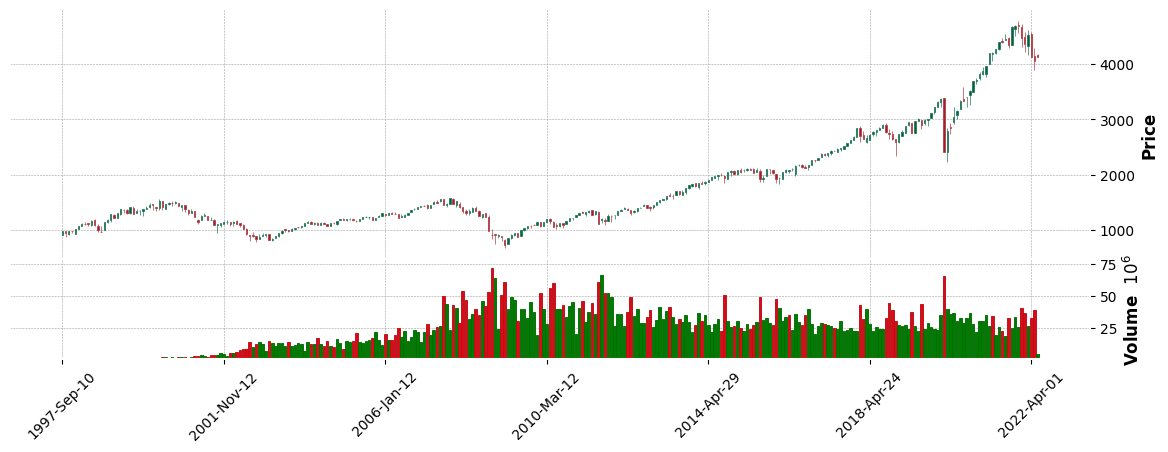

In [5]:
mplf.plot(tick_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Dollar Bars

In [6]:
data["dv"] = data["Close"] * data["Volume"]

In [7]:
mean_monthly_dv = np.mean(data.resample("M")["dv"].sum())
mean_monthly_dv

47127336043.29899

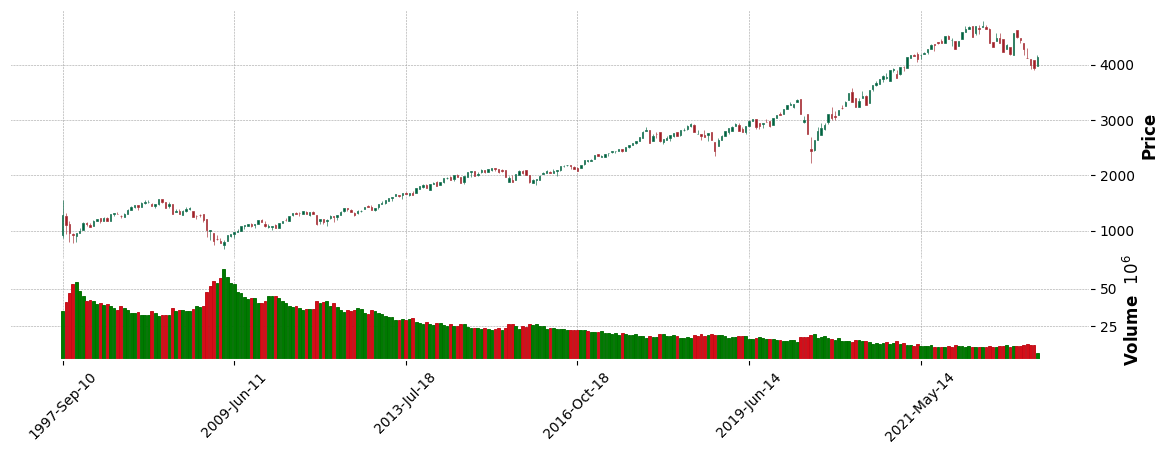

In [8]:
dv_bars = bars.create_dollar_volume_bars(data, mean_monthly_dv)
mplf.plot(dv_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Volume Bars

In [9]:
mean_monthly_volume = np.mean(data.resample("M")["Volume"].sum())
mean_monthly_volume

24667777.44107744

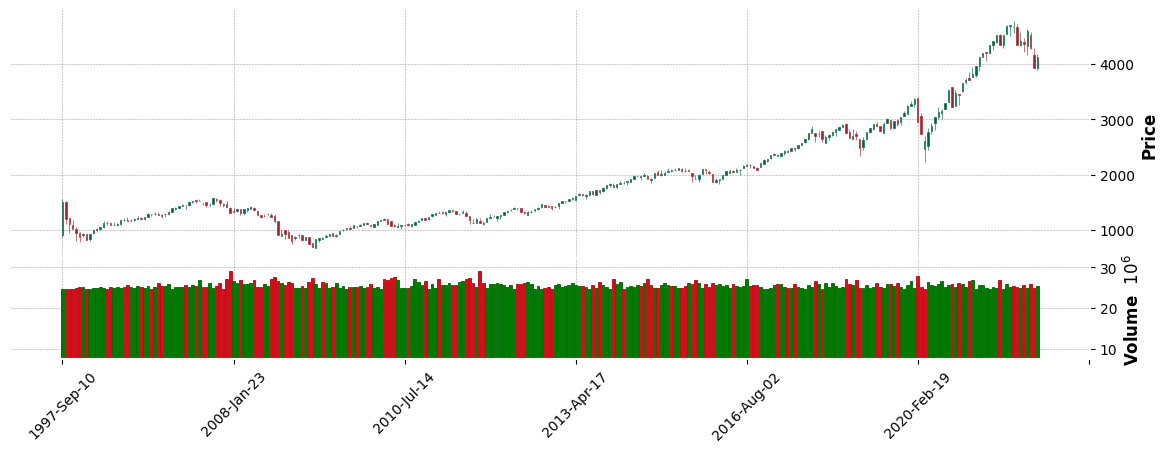

In [10]:
v_bars = bars.create_volume_bars(data, mean_monthly_volume)
mplf.plot(v_bars, type="candle", style="charles", figsize=(15, 5), volume=True)

# Annual Counts

<AxesSubplot:xlabel='Date'>

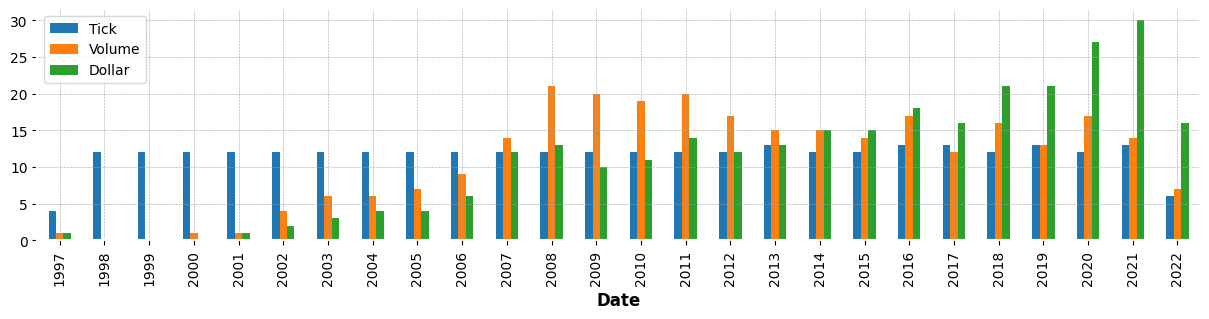

In [11]:
tick_bar_counts = tick_bars.resample("Y")["Close"].count()
v_bar_counts = v_bars.resample("Y")["Close"].count()
dv_bar_counts = dv_bars.resample("Y")["Close"].count()

count_df = pd.concat([tick_bar_counts, v_bar_counts, dv_bar_counts], axis=1)
count_df.columns = ["Tick", "Volume", "Dollar"]
count_df.index = count_df.index.strftime("%Y")

count_df.plot(kind="bar", figsize=[15, 3])

# Autocorrelations

In [12]:
def add_returns(data):
    data["return"] = data["Close"].divide(data["Close"].shift(1)) - 1
    return data


tick_autocorr = add_returns(tick_bars)["return"].autocorr()
v_autocorr = add_returns(v_bars)["return"].autocorr()
dv_autocorr = add_returns(dv_bars)["return"].autocorr()

pd.DataFrame(
    {
        "Bar Type": ["Tick", "Volume", "Dollar Volume"],
        "Auto Correlation": [tick_autocorr, v_autocorr, dv_autocorr],
    }
)

,Bar Type,Auto Correlation
0,Tick,-0.125835
1,Volume,0.060034
2,Dollar Volume,0.015775
